# Demonstration of some Libraries included in the Anaconda Repository
In this Jupyter Notebook I want to demonstrate some basic usage of the libraries in the Anaconda repository. Anaconda includes many different python packages which are useful for Data Science applications. Here, we focus on the packages pandas (for dataframes), sklearn (for machine learning) and matplotlib (for plotting the obtained results).

For this reason I have chosen as public dataset from [Kaggle](www.kaggle.com) which can be downloaded from [here](https://www.kaggle.com/ludobenistant/hr-analytics). It is a simulated dataset for Human Resource Analytics and is used for demonstrating a classification problem on an imbalanced dataset.

The main question which we would like to answer is *"Why are our best and most experienced employees leaving prematurely?"*.
We want to answer this question with a Random Forest model.

In [40]:
# Setting the ast_node_interactivity to "all" will print
# each statement, not only the last one of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import preprocessing
import matplotlib

# change the plotting stlye to ggplot (ggplot is a plotting library in R)
matplotlib.style.use('ggplot')

First, let us load the data, which is given as a comma seperated file, as a pandas dataframe and use some common commands:

In [69]:
# create a pandas dataframe
df = pd.read_csv(filepath_or_buffer = '/home/PNW/z001291/Data/HR_comma_sep.csv')

# print the first five records of the dataframe
df.head()

# print the attributes as an pandas index 
df.columns

# perform some summary statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'sales', u'salary'],
      dtype='object')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Here we can already observe that the dataset is imbalanced. The field *left* is 1 for an employee who left and 0 if he did not leave. Hence, the *mean* indicates that roughly 24 % left and 76 % stayed

With a pandas dataframe we can also perform some SQL-like commands. Here, we demonstrate a *group by* and a count. It shows how many employees from a specific department left or stayed.

(Note: This is just meant to be a demonstration and not meant to be a best practice approach to obtain the needed result)

In [115]:
# use a group by and count
dfDepratmentsLeft = df.groupby(['sales', 'left']).count()

# create a Dataframe from the numpy array and rename a column
pd.DataFrame(dfDepratmentsLeft['salary']).rename(columns={'salary': 'count'})

count
sales       left       
IT          0       954
            1       273
RandD       0       666
            1       121
accounting  0       563
            1       204
hr          0       524
            1       215
management  0       539
            1        91
marketing   0       655
            1       203
product_mng 0       704
            1       198
sales       0      3126
            1      1014
support     0      1674
            1       555
technical   0      2023
            1       697

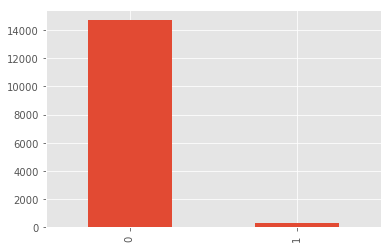

In [32]:
#fig, ax = plt.subplots()
df['promotion_last_5years'].value_counts().plot(kind='bar')
plt.show()

For a Random Forest we actually do not need to normalize the data since different features are not compared at a single split. Not that this is different to SVM where a normalization could be needed.

Sklearn preprocessing implements a lot of different function for preprocessing. Rather than implement a normalization function on your own you should always first look if the required normalization function is already implemented. This makes code much more readable.

We can use a normalizer with sklearn.preprocessing.normalize(DataToNormalize, Norm, etc) and specifiy the norm. For more information please look [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html).

There are not only normalizer functions but also scaler functions implemented. Here we demonstrate the usage of the MinmaxScaler which is defined as:
\begin{align}
x' = \frac{x - \min(x)}{\max(x) - \min(x)}
\end{align}
Using this scaler we shift the range from $[\min(x),\max(x)]$ to $[0,1]$.

Some useful normalization functions are the L1 Norm (in german often called *Betragssummennorm*) and the euclidean Norm L2 which is the length of the vector.

Let us now demonstrate the L1 Norm:

In [148]:
# normalize function actually works on a row and the scaler on a column. With the axis argument this can be changed.
df_normalized = pd.DataFrame(preprocessing.normalize(df[['time_spend_company']],
                                                     norm = 'l1', axis = 0))

# if you do not create a dataframe directly we can also return the norm
preprocessing.normalize(df[['time_spend_company']], norm = 'l1', axis = 0, return_norm = True)

# print first five dataframe elements
# we see that each element in a feature column has been divided by the norm
df_normalized.head()

# let us check if the sum of the columns is one
df_normalized.sum()

(array([[  5.71755289e-05],
        [  1.14351058e-04],
        [  7.62340385e-05],
        ..., 
        [  5.71755289e-05],
        [  7.62340385e-05],
        [  5.71755289e-05]]), array([ 52470.]))

,0
0,0.000057
1,0.000114
2,0.000076
3,0.000095
4,0.000057


0    1.0
dtype: float64

In [153]:
# Here we demonstrate the MinMax Scaler
scaler = preprocessing.MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[['average_montly_hours', 'time_spend_company']]),
                         columns=['time_spend_company', 'average_montly_hours'])

df_scaled.head()

,time_spend_company,average_montly_hours
0,0.285047,0.125
1,0.775701,0.500
2,0.822430,0.250
3,0.593458,0.375
4,0.294393,0.125


Now we want to use a string indexer and a vector assembler to get a feature vector which can be used for the random forest.

In [159]:
# A single encoder
le = preprocessing.LabelEncoder()
le.fit(df['sales'])
le.transform(df['sales'])
le.classes_

#pd-get_dummies for onehotencoder


LabelEncoder()

array([7, 7, 7, ..., 8, 8, 8])

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

LabelEncoder()

In [56]:
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

In [65]:
fit = df[['salary', 'sales']].apply(lambda x: d[x.name].fit_transform(x))
fit.apply(lambda x: d[x.name].inverse_transform(x)).head()

,salary,sales
0,low,sales
1,medium,sales
2,medium,sales
3,low,sales
4,low,sales


In [66]:
df[['salary', 'sales']].apply(lambda x: d[x.name].transform(x)).head()

,salary,sales
0,1,7
1,2,7
2,2,7
3,1,7
4,1,7


The Random Forest cannot handle categorical Input Features yet. Hence, we have to use a OneHotEncoder.
Here we can either use the OneHotEncoder function from sklearn or the get_dummies option from pandas.

Not that it is still in discussion implement direct support of categorical variables in sklearn (see github).

In [201]:
df_dummies = pd.get_dummies(data=df[['salary', 'sales']],columns=['salary', 'sales'])
df_dummies.head()

,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0


In [173]:
import sklearn.feature_selection as fs
import sklearn.pipeline as pl

In [198]:
df_final = pd.concat([df.drop(['salary', 'sales'], axis = 1),df_dummies], axis = 1)

In [199]:
df_label = df['left']

In [202]:
df_final.head()
df_label.head()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [196]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_final, test_size = 0.2)

In [236]:
train_df.head()
test_df['left'].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
4297,0.78,0.98,5,252,3,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4295,0.51,0.50,5,251,3,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2546,0.18,0.67,5,285,5,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
14280,0.43,0.50,2,135,3,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6073,0.92,0.84,4,159,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


5909    0
8034    0
1769    1
8225    0
882     1
Name: left, dtype: int64

In [209]:
features_matrix = train_df.drop('left', axis = 1).as_matrix()
label_vector = train_df['left'].as_matrix()

In [211]:
label_vector
features_matrix

array([0, 0, 0, ..., 0, 0, 1])

array([[ 0.78,  0.98,  5.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.51,  0.5 ,  5.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.18,  0.67,  5.  , ...,  0.  ,  0.  ,  0.  ],
       ..., 
       [ 0.62,  0.58,  3.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.86,  0.58,  3.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.45,  0.51,  2.  , ...,  1.  ,  0.  ,  0.  ]])

In [212]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
clf = RandomForestClassifier(random_state=0)

In [214]:
clf.fit(features_matrix, label_vector)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [215]:
print(clf.feature_importances_)

[ 0.29779471  0.14407414  0.15478034  0.16076937  0.18814826  0.01340786
  0.00178086  0.00618995  0.00448366  0.00443644  0.00233117  0.00190366
  0.00166104  0.002444    0.00201117  0.00168582  0.0013114   0.00396401
  0.00285187  0.00397027]


In [217]:
test_features_matrix = test_df.drop('left', axis = 1).as_matrix()
test_label_vector = test_df['left'].as_matrix()

In [218]:
clf.score(test_features_matrix, test_label_vector)

0.98799999999999999

In [247]:
test_df["pred"] = clf.predict(test_features_matrix)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5f8785e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd5f8375590>]], dtype=object)

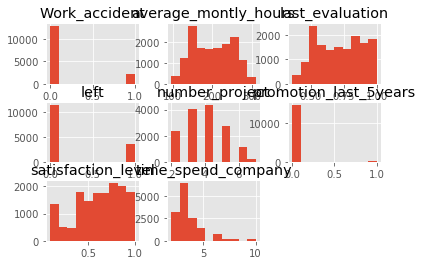

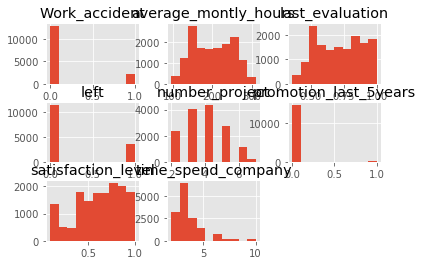

In [224]:
df.hist()
plt.show()

In [229]:
# maybe this should be installed in the future?
#from imblearn.over_sampling import SMOTE 

In [228]:
predDf = pd.DataFrame(pred)
predDf.head()

,0
0,0
1,0
2,1
3,0
4,1


In [245]:
#pd.concat([test_df['left'],predDf], axis = 0)
#predDf.drop_duplicates
predDf.head()
test_df.head()

,0
0,0
1,0
2,1
3,0
4,1


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
5909,0.28,0.83,4,206,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8034,0.90,0.53,3,270,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1769,0.40,0.47,2,144,3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8225,0.96,0.53,3,158,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
882,0.11,0.79,6,294,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [252]:
output_df = test_df[['left', 'pred']]

pd.crosstab(output_df.left, output_df.pred, margins=True)

pred,0,1,All
left,,,
0,2264,7,2271
1,29,700,729
All,2293,707,3000


In [255]:
x,y, _= skl.metrics.roc_curve(output_df['left'], output_df['pred'])

In [256]:
x

array([ 0.        ,  0.00308234,  1.        ])

In [257]:
y

array([ 0.        ,  0.96021948,  1.        ])

In [258]:
plt.scatter(x,y)

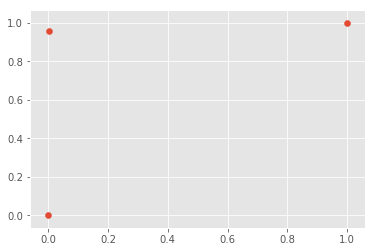

In [259]:
plt.show()